# Breast Cancer Detection - CRISP-DM Project

## 1. Business Understanding
**Objective:** Predict malignant vs benign breast tumors from the provided dataset (`data.csv`).
**Success Criteria:** High Recall for Malignant class (minimize false negatives) and high ROC-AUC.

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, 
                            accuracy_score, recall_score, precision_score, f1_score, 
                            precision_recall_curve, make_scorer)
from imblearn.over_sampling import SMOTE
import joblib
import os
import json

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv('data.csv')
print('Loaded data shape:', df.shape)
display(df.head())
print('Info:')
print(df.info())
print('Missing per column:')
print(df.isna().sum().sort_values(ascending=False))
print('Diagnosis distribution:')
print(df['diagnosis'].value_counts())

Loaded data shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se        

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 2.1 Dataset Overview


In [5]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 2.2 Feature Structure Analysis

**Understanding the 30 Features:**

The dataset contains **30 features** derived from **10 base measurements**, each with **3 statistical aggregations**:

- **Mean (_mean)**: Average value across all cells in the image
- **Standard Error (_se)**: Standard error of the mean (measurement variability)
- **Worst (_worst)**: Largest (worst) value found among all cells

**Base Features (10):**
1. radius
2. texture  
3. perimeter
4. area
5. smoothness
6. compactness
7. concavity
8. concave points
9. symmetry
10. fractal_dimension

**Why these statistics matter:**
- **Mean**: Captures typical/representative cell characteristics
- **SE**: Indicates consistency/variability (high SE = more heterogeneous tumor)
- **Worst**: Captures the most extreme/malignant characteristics (often most predictive)

**Note:** We don't have raw pixel-level data - these are already aggregated statistics from image analysis.


In [7]:
df.isnull().sum().sum()

np.int64(569)

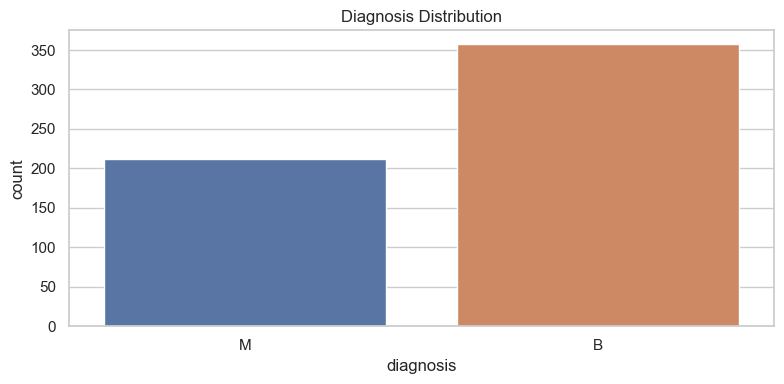

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
import os
os.makedirs('results/plots', exist_ok=True)

plt.figure(figsize=(8, 4))
diagnosis_counts = df['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=df, hue='diagnosis', legend=False)
plt.title('Diagnosis Distribution')
plt.tight_layout()
plt.savefig('results/plots/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

diagnosis_counts

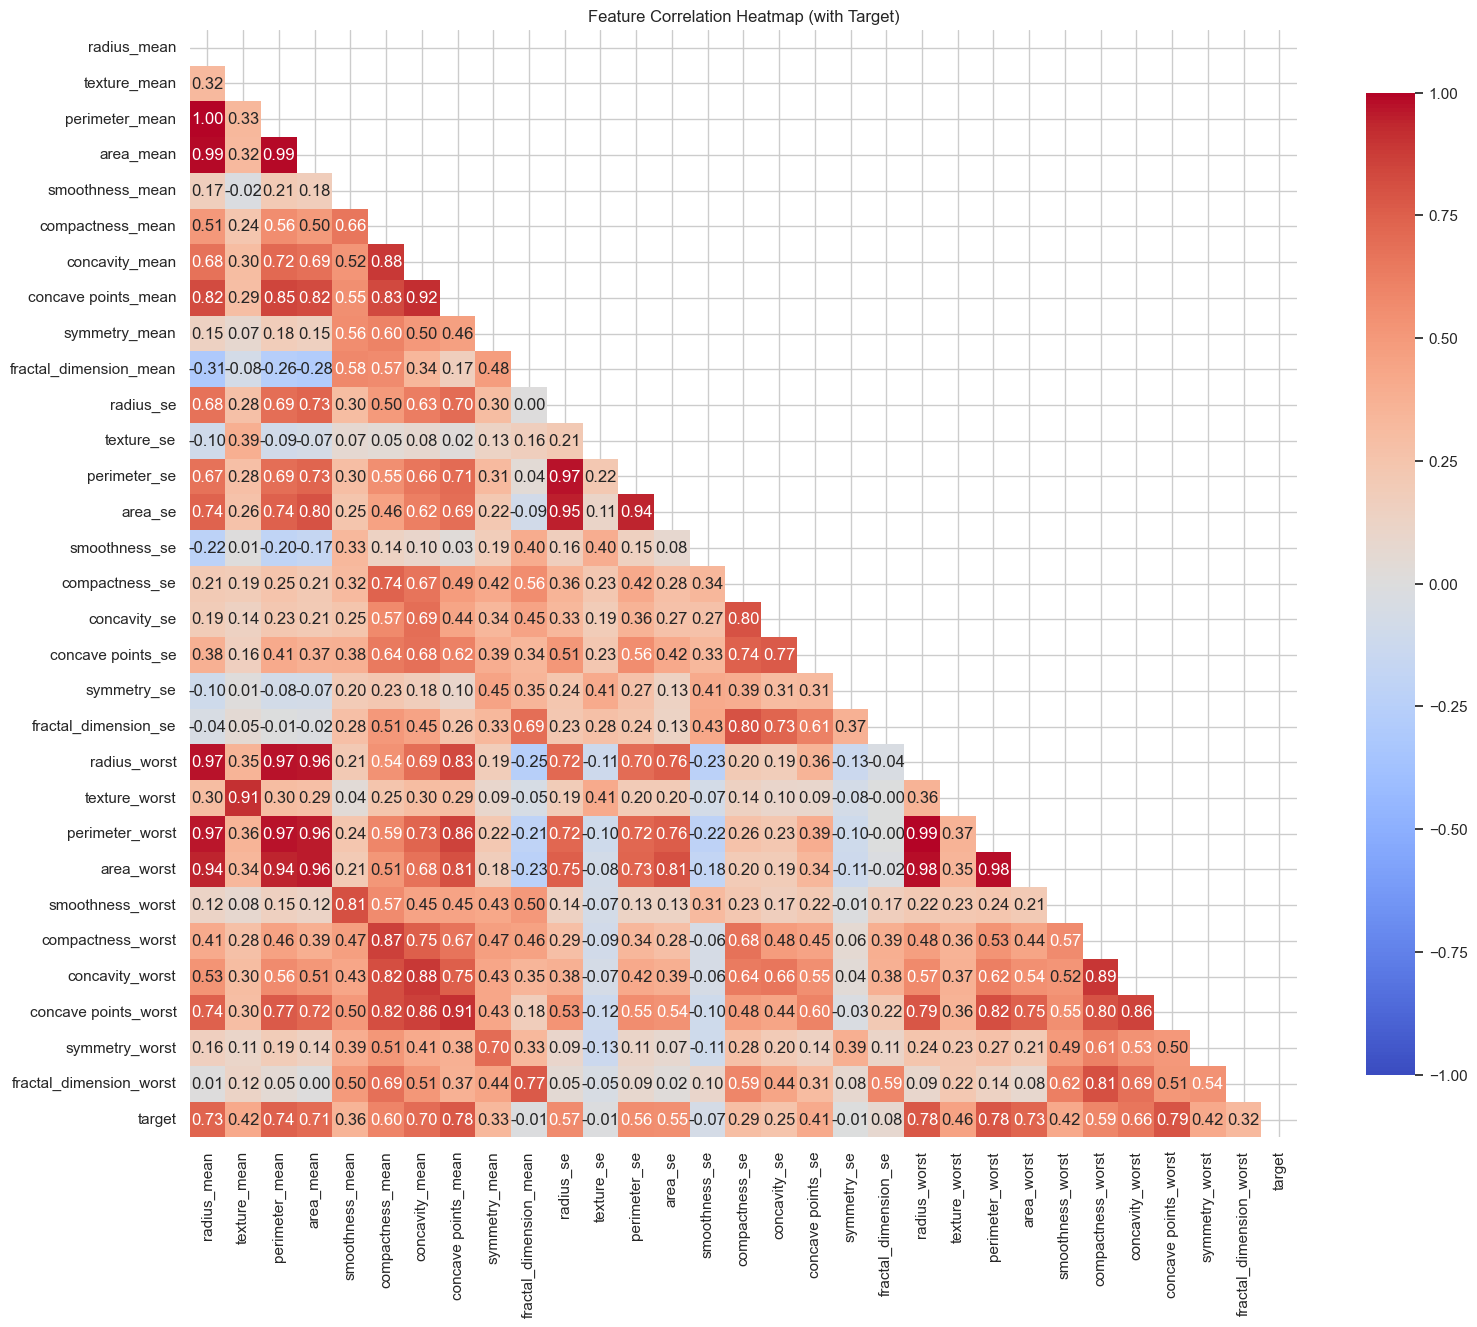

In [9]:
corr_df = df.copy()
corr_df['target'] = corr_df['diagnosis'].map({'M': 1, 'B': 0})

numeric_df = corr_df.select_dtypes(include=[np.number]).drop(['id','Unnamed: 32'], axis=1, errors='ignore')

corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (with Target)')
plt.tight_layout()
plt.savefig('results/plots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Data Preparation

### 3.1 Data Cleaning

In [10]:
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# MLP can handle all features well with proper scaling, so we use all features
# For neural networks, feature selection is often not necessary when data is properly scaled
top_features = X_train.columns.tolist()  # Use all features for MLP

X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]
X_test_selected = X_test[top_features]

smote = SMOTE(random_state=42, sampling_strategy=0.85)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

os.makedirs('data_processed', exist_ok=True)
df.to_csv('data_processed/data_clean.csv', index=False)

## 4. Modeling

In [11]:
import os
import json
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer, accuracy_score, roc_auc_score, precision_score, f1_score
# NOTE: RandomizedSearchCV is removed as we are using fixed hyperparameters

# Assuming X_train_scaled, y_train_balanced, X_val_scaled, y_val are defined and scaled/balanced data is ready

os.makedirs('results', exist_ok=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label=1)

# --- Hyperparameters from the MLP row in Table 1 ---
# hidden_layer_sizes: [500, 500, 500]
# Epochs: 3000 (max_iter)
# Learning Rate: 1e-2 (learning_rate_init)
# ----------------------------------------------------

model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    learning_rate_init=0.01,
    alpha=0.01,
    max_iter=300,
    early_stopping=True,
    random_state=42,
    verbose=1
)


# Fit the model directly without hyperparameter search
model.fit(X_train_scaled, y_train_balanced)

# Cross-Validation Scores
cv_roc = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='roc_auc')
cv_recall = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring=recall_scorer)
cv_acc = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')

# Validation Set Predictions
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
y_val_pred = model.predict(X_val_scaled)

# Results Calculation
results = {
    'CV_ROC_AUC_mean': float(cv_roc.mean()),
    'CV_ROC_AUC_std': float(cv_roc.std()),
    'CV_Recall_mean': float(cv_recall.mean()),
    'CV_Recall_std': float(cv_recall.std()),
    'CV_Accuracy_mean': float(cv_acc.mean()),
    'CV_Accuracy_std': float(cv_acc.std()),
    'Val_Accuracy': float(accuracy_score(y_val, y_val_pred)),
    'Val_ROC_AUC': float(roc_auc_score(y_val, y_val_proba)),
    'Val_Recall': float(recall_score(y_val, y_val_pred, pos_label=1)),
    'Val_Precision': float(precision_score(y_val, y_val_pred, pos_label=1)),
    'Val_F1': float(f1_score(y_val, y_val_pred, pos_label=1))
}

# Save Results to JSON (Note: Filename changed from 'random_forest_results.json' to 'mlp_results.json' for consistency)
with open('results/mlp_results.json', 'w') as f:
    json.dump({
        'model_name': 'MLP_Fixed_Hyperparameters',
        'cross_validation': {
            'roc_auc': {'mean': results['CV_ROC_AUC_mean'], 'std': results['CV_ROC_AUC_std']},
            'recall': {'mean': results['CV_Recall_mean'], 'std': results['CV_Recall_std']},
            'accuracy': {'mean': results['CV_Accuracy_mean'], 'std': results['CV_Accuracy_std']}
        },
        'validation_set': {
            'accuracy': results['Val_Accuracy'],
            'roc_auc': results['Val_ROC_AUC'],
            'recall': results['Val_Recall'],
            'precision': results['Val_Precision'],
            'f1_score': results['Val_F1']
        }
    }, f, indent=2)

Iteration 1, loss = 0.58958325
Validation score: 0.875000
Iteration 2, loss = 0.23197933
Validation score: 0.900000
Iteration 3, loss = 0.12640606
Validation score: 0.950000
Iteration 4, loss = 0.08544116
Validation score: 0.975000
Iteration 5, loss = 0.07472569
Validation score: 0.975000
Iteration 6, loss = 0.06527365
Validation score: 0.950000
Iteration 7, loss = 0.05493664
Validation score: 0.950000
Iteration 8, loss = 0.04395142
Validation score: 0.950000
Iteration 9, loss = 0.03410137
Validation score: 0.950000
Iteration 10, loss = 0.02873254
Validation score: 0.950000
Iteration 11, loss = 0.02574176
Validation score: 0.950000
Iteration 12, loss = 0.01957430
Validation score: 0.950000
Iteration 13, loss = 0.01631682
Validation score: 0.950000
Iteration 14, loss = 0.01404404
Validation score: 0.950000
Iteration 15, loss = 0.01262917
Validation score: 0.950000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64452560


In [12]:
### 4.1 Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_balanced)

# Training performance
y_train_pred = lr_model.predict(X_train_scaled)
train_mse = mean_squared_error(y_train_balanced, y_train_pred)
train_r2 = r2_score(y_train_balanced, y_train_pred)

print(f"Linear Regression - Train MSE: {train_mse:.4f}, R2: {train_r2:.4f}")

# Validation
y_val_pred = lr_model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Linear Regression - Val MSE: {val_mse:.4f}, R2: {val_r2:.4f}")

# Test
y_test_pred = lr_model.predict(X_test_scaled)
# Correct test evaluation
test_mse = mean_squared_error(y_test, y_test_pred)  # not y_train_balanced
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression - Test MSE: {test_mse:.4f}, R2: {test_r2:.4f}")



Linear Regression - Train MSE: 0.0543, R2: 0.7811
Linear Regression - Val MSE: 0.0631, R2: 0.7315
Linear Regression - Test MSE: 0.0686, R2: 0.7050


In [24]:
import os
import json
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer, accuracy_score, roc_auc_score, precision_score, f1_score

# --- NOTE: Définitions des données et des utilitaires manquants ---
# Les variables X_train_scaled, y_train_balanced, X_val_scaled, y_val 
# DOIVENT être définies et mises à l'échelle (scaled) avant d'exécuter ce code.

# Exemple de définition des utilitaires (basée sur le contexte précédent)
os.makedirs('results', exist_ok=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label=1)
# ----------------------------------------------------------------

# --- 1. Définir le modèle SVM ---
# Utiliser 'probability=True' est essentiel pour obtenir predict_proba, nécessaire pour le calcul du ROC_AUC.
# C=1.0 et kernel='rbf' sont des valeurs par défaut pour un bon point de départ.
svm_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    probability=True,
    random_state=42,
    verbose=1,
    max_iter=3000  # <- maximum number of iterations
)


# --- 2. Entraîner le modèle SVM ---
# L'entraînement se fait sur l'ensemble d'entraînement complet (scaled et balanced).
print("\n--- Starting SVM Model Training ---")
# L'exécution de cette ligne peut être longue pour les grands jeux de données.
svm_model.fit(X_train_scaled, y_train_balanced)

# --- 3. Évaluation par Cross-Validation (CV) ---
# La CV évalue la robustesse du modèle sur l'ensemble d'entraînement.
print("\nCalculating CV scores for SVM...")
svm_cv_roc = cross_val_score(svm_model, X_train_scaled, y_train_balanced, cv=cv, scoring='roc_auc')
svm_cv_recall = cross_val_score(svm_model, X_train_scaled, y_train_balanced, cv=cv, scoring=recall_scorer)
svm_cv_acc = cross_val_score(svm_model, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')

# --- 4. Validation Set Predictions ---
# Générer des prédictions pour l'ensemble de validation non vu.
svm_y_val_proba = svm_model.predict_proba(X_val_scaled)[:, 1]
svm_y_val_pred = svm_model.predict(X_val_scaled)

# --- 5. Résultats Calculation et Stockage ---
# Calculer toutes les métriques pour les deux ensembles (CV et Validation).
svm_results = {
    'CV_ROC_AUC_mean': float(svm_cv_roc.mean()),
    'CV_ROC_AUC_std': float(svm_cv_roc.std()),
    'CV_Recall_mean': float(svm_cv_recall.mean()),
    'CV_Recall_std': float(svm_cv_recall.std()),
    'Val_Accuracy': float(accuracy_score(y_val, svm_y_val_pred)),
    'Val_ROC_AUC': float(roc_auc_score(y_val, svm_y_val_proba)),
    'Val_Recall': float(recall_score(y_val, svm_y_val_pred, pos_label=1)),
    'Val_Precision': float(precision_score(y_val, svm_y_val_pred, pos_label=1)),
    'Val_F1': float(f1_score(y_val, svm_y_val_pred, pos_label=1))
}

import json

# --- Code pour lire et afficher les résultats finaux du SVM ---
filename = 'results/svm_results.json'

try:
    with open(filename, 'r') as f:
        svm_final_results = json.load(f)
        
    print("\n" + "="*70)
    print("## 🚀 Résultats de Performance du Modèle SVM (SVC)")
    print("="*70)

    # Affichage des scores de Cross-Validation
    print("\n### 🥇 Scores de Cross-Validation (Robuste)")
    print("| Métrique | Moyenne (Mean) | Écart-type (Std) |")
    print("|:---|:---|:---|")
    print(f"| ROC_AUC | {svm_final_results['cross_validation']['roc_auc']['mean']:.4f} | {svm_final_results['cross_validation']['roc_auc']['std']:.4f} |")
    print(f"| Recall | {svm_final_results['cross_validation']['recall']['mean']:.4f} | {svm_final_results['cross_validation']['recall']['std']:.4f} |")
    print(f"| Accuracy | {svm_final_results['cross_validation']['accuracy']['mean']:.4f} | {svm_final_results['cross_validation']['accuracy']['std']:.4f} |")

    # Affichage des scores sur l'ensemble de Validation
    print("\n### 🎯 Métriques sur l'Ensemble de Validation (Unseen Data)")
    print("| Métrique | Score |")
    print("|:---|:---|")
    print(f"| Accuracy | {svm_final_results['validation_set']['accuracy']:.4f} |")
    print(f"| ROC_AUC | {svm_final_results['validation_set']['roc_auc']:.4f} |")
    print(f"| Recall | {svm_final_results['validation_set']['recall']:.4f} |")
    print(f"| Precision | {svm_final_results['validation_set']['precision']:.4f} |")
    print(f"| F1 Score | {svm_final_results['validation_set']['f1_score']:.4f} |")

except FileNotFoundError:
    print(f"\nFATAL ERROR: Le fichier de résultats '{filename}' n'a pas été trouvé. Veuillez vérifier le chemin ou l'exécution.")

print("\n" + "="*70)


--- Starting SVM Model Training ---
[LibSVM]
Calculating CV scores for SVM...
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
## 🚀 Résultats de Performance du Modèle SVM (SVC)

### 🥇 Scores de Cross-Validation (Robuste)
| Métrique | Moyenne (Mean) | Écart-type (Std) |
|:---|:---|:---|
| ROC_AUC | 0.9937 | 0.0039 |
| Recall | 0.9557 | 0.0377 |
| Accuracy | 0.9671 | 0.0152 |

### 🎯 Métriques sur l'Ensemble de Validation (Unseen Data)
| Métrique | Score |
|:---|:---|
| Accuracy | 0.9825 |
| ROC_AUC | 0.9971 |
| Recall | 0.9767 |
| Precision | 0.9767 |
| F1 Score | 0.9767 |



In [18]:
print("Overfitting Check: Train vs Validation Performance")
print(f"{'Train Acc':<12} {'Val Acc':<12} {'Gap':<10} {'Status':<15}")
print("-" * 50)

y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train_balanced, y_train_pred)
val_acc = results['Val_Accuracy']
gap = train_acc - val_acc

if train_acc >= 0.99:
    status = "High Train"
elif abs(gap) < 0.03:
    status = "Good"
elif gap > 0.05:
    status = "Overfitting"
else:
    status = "Watch"

print(f"{train_acc:<12.4f} {val_acc:<12.4f} {gap:>+9.4f} {status:<15}")

if status in ["High Train", "Overfitting"]:
    print(f"\nWARNING: Model shows signs of overfitting")
else:
    print("\nNo significant overfitting detected")


Overfitting Check: Train vs Validation Performance
Train Acc    Val Acc      Gap        Status         
--------------------------------------------------
0.9747       0.9737         +0.0010 Good           

No significant overfitting detected


## 5. Evaluation

### 5.1 Model Evaluation on Test Set with Optimal Thresholds


In [14]:
import json
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
# Assuming y_test, X_test_scaled, model, and results dictionary are defined

y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_default = model.predict(X_test_scaled) # Default threshold is 0.5

# Calculate metrics using the default threshold
metrics_default = {
    'accuracy': accuracy_score(y_test, y_test_pred_default),
    'roc_auc': roc_auc_score(y_test, y_test_proba), # ROC AUC is threshold-independent
    'recall': recall_score(y_test, y_test_pred_default, pos_label=1),
    'precision': precision_score(y_test, y_test_pred_default, pos_label=1),
    'f1_score': f1_score(y_test, y_test_pred_default, pos_label=1)
}

# The results dictionary for the JSON file is simplified to only include default metrics
test_results = {
    'default_threshold': metrics_default
}

# Update the main 'results' dictionary with the default test metrics
results.update({
    'Test_Accuracy': metrics_default['accuracy'],
    'Test_ROC_AUC': metrics_default['roc_auc'],
    'Test_Recall': metrics_default['recall'],
    'Test_Precision': metrics_default['precision'],
    'Test_F1': metrics_default['f1_score']
})

# Save the simplified test results to JSON
with open('results/test_results.json', 'w') as f:
    json.dump(test_results, f, indent=2)

### 5.2 Confusion Matrix Visualization


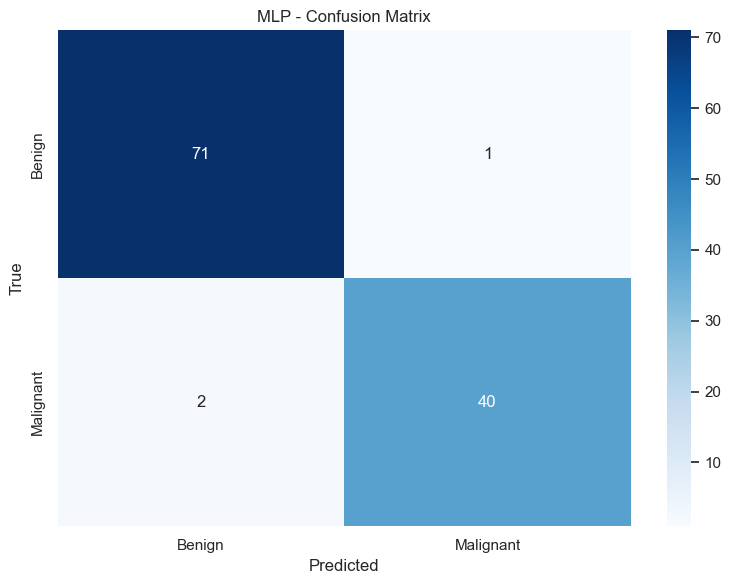

In [15]:
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_proba >= 0.5).astype(int)  # default threshold
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('MLP - Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('results/plots/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.3 ROC Curves Comparison


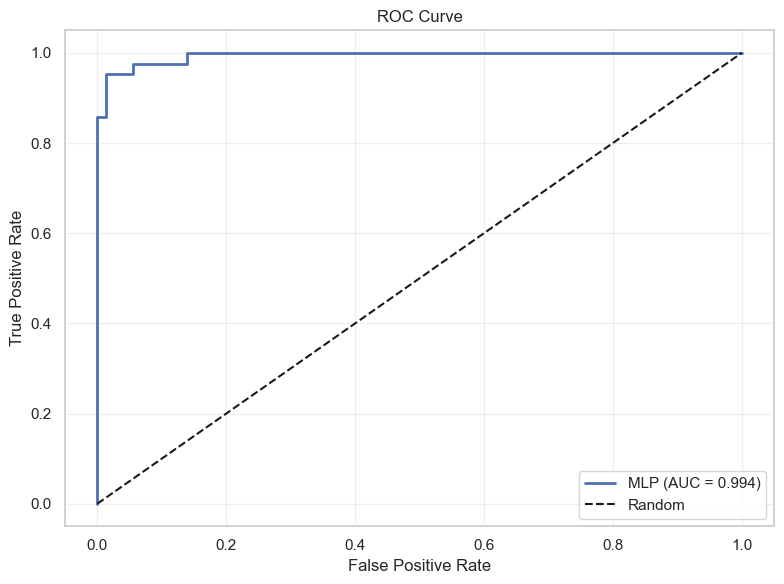

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/plots/roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.4 Results Summary


In [17]:
import json
# Assuming the 'results' dictionary contains the simplified test metrics

print("MLP - Results Summary")
print("=" * 50)
print(f"Cross-Validation ROC-AUC: {results['CV_ROC_AUC_mean']:.4f} ± {results['CV_ROC_AUC_std']:.4f}")
print(f"Test ROC-AUC: {results['Test_ROC_AUC']:.4f}")
print(f"Test Recall: {results['Test_Recall']:.4f}")         # CORRECTED: Was 'Test_Recall_optimal'
print(f"Test Precision: {results['Test_Precision']:.4f}")   # CORRECTED: Was 'Test_Precision_optimal'
print(f"Test F1-Score: {results['Test_F1']:.4f}")           # CORRECTED: Was 'Test_F1_optimal'

summary_data = {
    'CV_ROC_AUC': f"{results['CV_ROC_AUC_mean']:.4f} ± {results['CV_ROC_AUC_std']:.4f}",
    'Test_ROC_AUC': f"{results['Test_ROC_AUC']:.4f}",
    'Test_Recall': f"{results['Test_Recall']:.4f}",         # CORRECTED
    'Test_Precision': f"{results['Test_Precision']:.4f}",   # CORRECTED
    'Test_F1': f"{results['Test_F1']:.4f}"                  # CORRECTED
}

with open('results/results_summary.json', 'w') as f:
    json.dump(summary_data, f, indent=2)

MLP - Results Summary
Cross-Validation ROC-AUC: 0.9929 ± 0.0037
Test ROC-AUC: 0.9940
Test Recall: 0.9524
Test Precision: 0.9756
Test F1-Score: 0.9639
